<a href="https://colab.research.google.com/github/abdoulayegk/major-project-sharda/blob/main/Optimized_code_financial_inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q catboost

In [2]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
)
# import classification algorithm
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LogisticRegression
# evaluation matrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
# import preprocessing module
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
# Sed set up
import numpy as np
from numpy import random
import io
from google.colab import files

random.seed(42)
seed = np.random.seed(42)

In [4]:
uploaded = files.upload()

Saving Test_v2.csv to Test_v2.csv
Saving Train_v2.csv to Train_v2.csv


In [5]:
train = pd.read_csv(io.BytesIO(uploaded['Train_v2.csv']))
test = pd.read_csv(io.BytesIO(uploaded['Test_v2.csv']))
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


# Explolatory Data Analysis
*This is the process of finding some insights from you dataset before create predictive models.*

Note: This is important steps in your Data science workflow.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## Let see the statistical overview of our dataset

In [8]:
# describe will show statistical info
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


From the above cell we can see that most of our features are categorical because ony 3 columns are numerical that's why it shows only those 3 with the mean, count, standard deviation also the minimum value of each columns the maximum value of each columns along with the interquartile range

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


From this info method we got to know more about our data it first show us the number of non null count als the datatype of each columns along with the total number of each datatypes we have. It shows here that we have 3 features with *int* dataypte and 10 *objects* datatype also it tell us about the size of the file we have which is in our case 2.3MB

In [10]:
# to show the shape of the data
train.shape

(23524, 13)

In [11]:
train.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

### Target Distribution

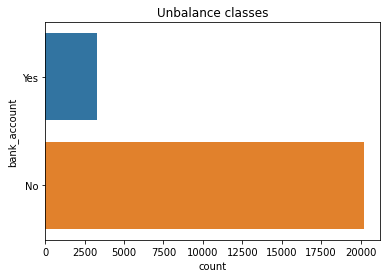

In [12]:
plt.title("Unbalance classes")
sns.countplot(y="bank_account", data=train)
plt.show()

From the above cell we can see that we have unbalanced data basically the number of No is much higher than the number of yes which can lead to poor model performence sometimes. In this can we've about 2500 yes and 20000 No which gives us a big difference later on we will what we can do for this .

### Let's see missing data

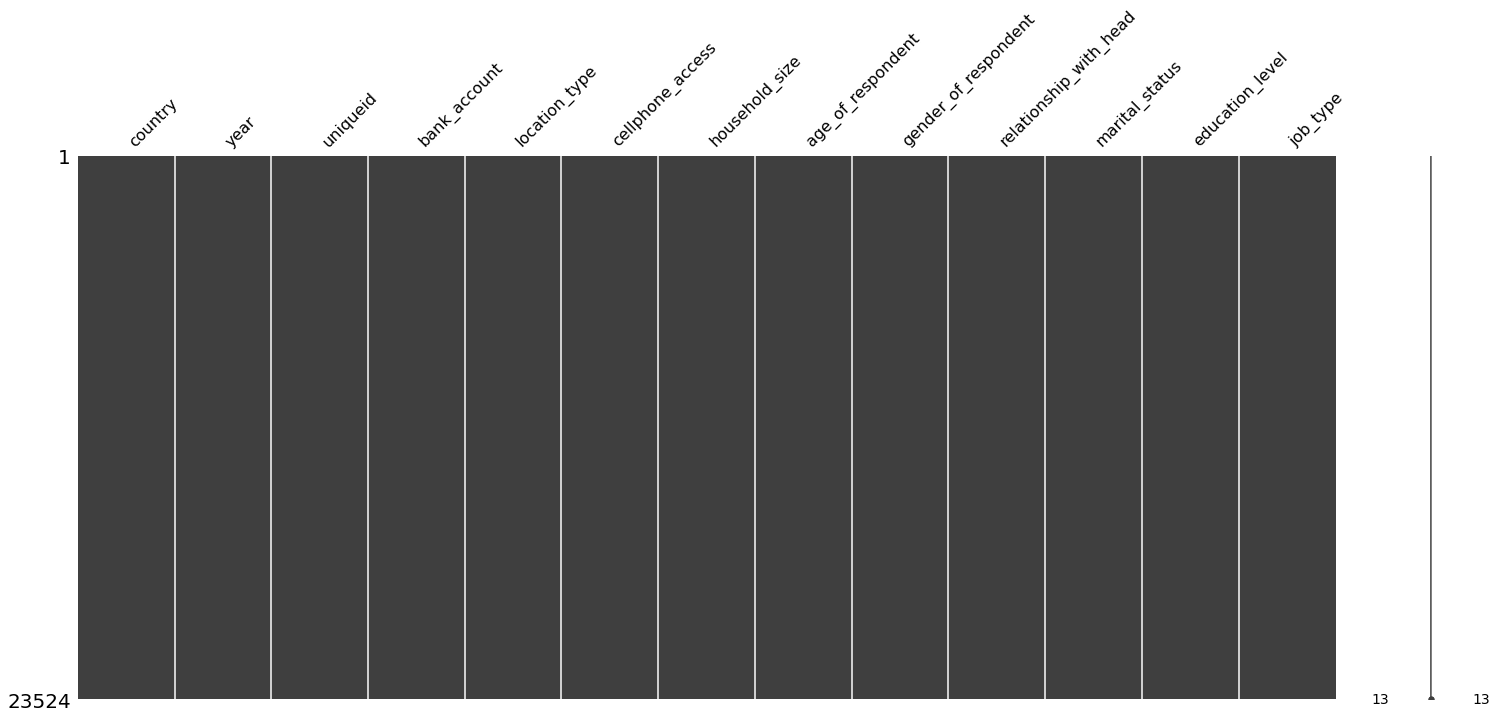

In [13]:
import missingno as mn

mn.matrix(train)

It shows that we don't have any missing values which is good

### Let's see the disctribution of the people with cellphone based on gender.

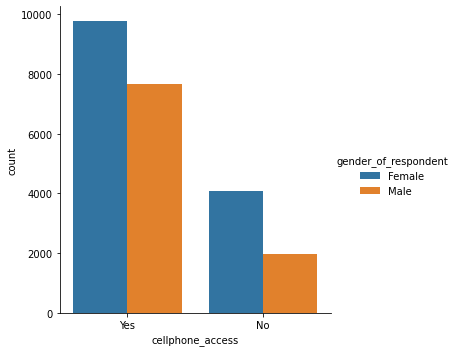

In [14]:
sns.catplot(x="cellphone_access", data=train, kind="count", hue="gender_of_respondent")
plt.show()

This shows that number of male having cellphones is higher than the numbero female in this case.

## Let's see the distribution of age

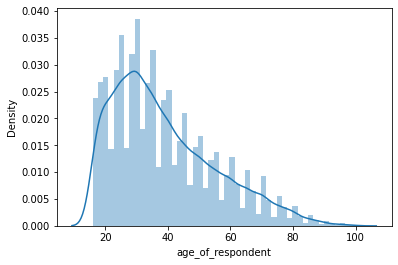

In [15]:
sns.distplot(train.age_of_respondent)

This distribution make sense because we have age range from 16 years old to 100 year

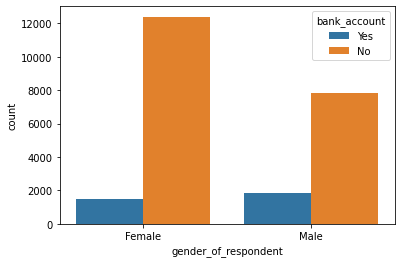

In [16]:
# Distribution of the gender
sns.countplot(train.gender_of_respondent, hue="bank_account", data=train)
plt.show()

we can see that the number of female that have bank account is higher than the number of male with a bank account. 

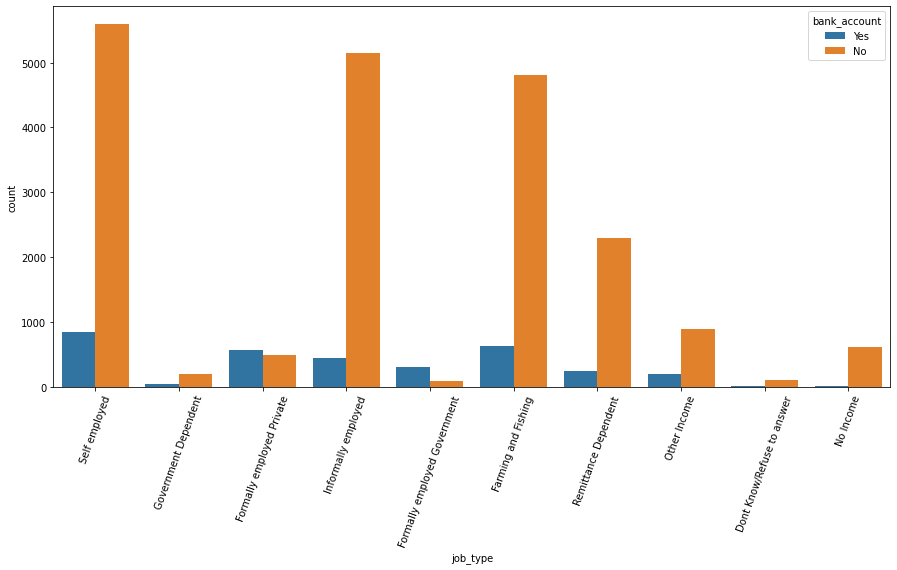

In [17]:
# distribution of job type
plt.figure(figsize=(15, 7))
sns.countplot(train.job_type, orient="h", hue="bank_account", data=train)
labels = [
    "Self employed",
    "Government Dependent",
    "Formally employed Private",
    "Informally employed",
    "Formally employed Government",
    "Farming and Fishing",
    "Remittance Dependent",
    "Other Income",
    "Dont Know/Refuse to answer",
    "No Income",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=70);

we can see from the above graph the the people who are self employed and farming and fishing are those who are more likely to have bank account as compare to the those who work for the Government or other income. 
We can notice also those who don't have no Income and does who reuse to answer don't have high chance of having bank account.

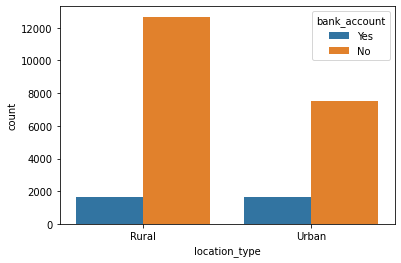

In [18]:
# Distribution of the location based on account
sns.countplot(train.location_type, hue="bank_account", data=train)

We can see that people in Urban area is have more chance to have bank_account than those who are in Rural area although we can see also the number people in Rural area is higher.

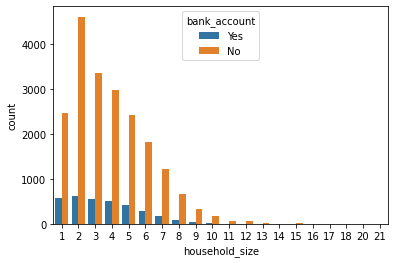

In [19]:
# Distirbution of the household_size
sns.countplot(train.household_size, hue="bank_account", data=train)

## How many people have cellphone

In [20]:
train.cellphone_access.value_counts()[0]

17454

we can see that the number of people who have cellphone access is 17454 which is more than the half which make more sense in this case

### How many types of education do the dataset has?

In [21]:
train.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

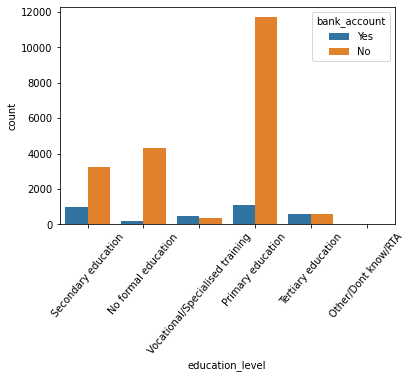

In [22]:
sns.countplot(train.education_level, hue="bank_account", data=train)
labels = [
    "Secondary education",
    "No formal education",
    "Vocational/Specialised training",
    "Primary education",
    "Tertiary education",
    "Other/Dont know/RTA",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=50);

we can see that the vocational/ specialised training is the majority in this case and we have few people with No formal education

In [23]:
train.marital_status.value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

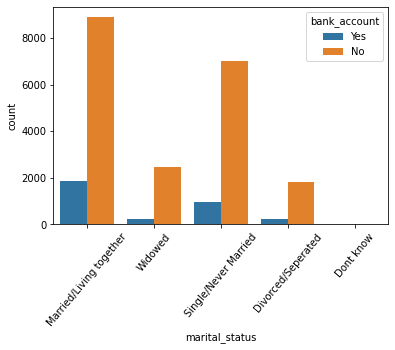

In [24]:
sns.countplot(train.marital_status, hue="bank_account", data=train)
labels = [
    "Married/Living together",
    "Widowed",
    "Single/Never Married",
    "Divorced/Seperated",
    "Dont know",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=50);

This shows that people who are married and living together are more likely to have a bank account as compare to ther slike single or divorced

In [25]:
# Convert target label to numerical Data
le = LabelEncoder()
train["bank_account"] = le.fit_transform(train["bank_account"])

# Separate training features from target
X_train = train.drop(["bank_account"], axis=1)
y_train = train["bank_account"]

In [26]:
train["country+location"] = train["country"] + train["location_type"]
train["location+cellphone_access"] = train["location_type"] + train["cellphone_access"]
train["gender+cellphone_access"] = (
    train["gender_of_respondent"] + train["cellphone_access"]
)
train["country+cellphone_access"] = train["country"] + train["cellphone_access"]

In [27]:
test["country+location"] = test["country"] + test["location_type"]
test["location+cellphone_access"] = test["location_type"] + test["cellphone_access"]
test["gender+cellphone_access"] = (
    test["gender_of_respondent"] + test["cellphone_access"]
)
test["country+cellphone_access"] = test["country"] + test["cellphone_access"]

In [28]:
df = train.drop(["uniqueid", "year"], 1)

In [29]:
col_test = test.uniqueid
test = test.drop("uniqueid", 1)

In [30]:
test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country+location,location+cellphone_access,gender+cellphone_access,country+cellphone_access
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,KenyaUrban,UrbanYes,MaleYes,KenyaYes
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,KenyaUrban,UrbanYes,MaleYes,KenyaYes
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,KenyaUrban,UrbanNo,MaleNo,KenyaNo


In [31]:
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country+location,location+cellphone_access,gender+cellphone_access,country+cellphone_access
0,Kenya,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,KenyaRural,RuralYes,FemaleYes,KenyaYes
1,Kenya,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
2,Kenya,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,KenyaUrban,UrbanYes,MaleYes,KenyaYes
3,Kenya,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,KenyaRural,RuralYes,FemaleYes,KenyaYes
4,Kenya,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,KenyaUrban,UrbanNo,MaleNo,KenyaNo


In [32]:
df = pd.get_dummies(df)
df.head()

,bank_account,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,...,gender+cellphone_access_MaleNo,gender+cellphone_access_MaleYes,country+cellphone_access_KenyaNo,country+cellphone_access_KenyaYes,country+cellphone_access_RwandaNo,country+cellphone_access_RwandaYes,country+cellphone_access_TanzaniaNo,country+cellphone_access_TanzaniaYes,country+cellphone_access_UgandaNo,country+cellphone_access_UgandaYes
0,1,3,24,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5,70,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,5,26,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0,5,34,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,8,26,1,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0


In [33]:
test = pd.get_dummies(test)

In [34]:
df.shape, test.shape

((23524, 64), (10086, 64))

In [35]:
# df.profile_report()

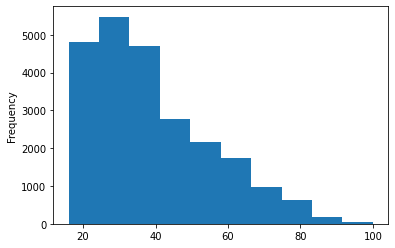

In [36]:
df.age_of_respondent.plot(kind="hist")

In [37]:
X = df.drop(["bank_account"], 1)
y = df.bank_account.values

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

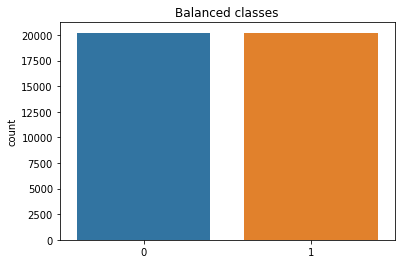

In [40]:
oversample = SMOTE()
# Oversampling the target data
X, y = oversample.fit_resample(X, y)
plt.title("Balanced classes")
sns.countplot(y)

In [41]:
# import statsmodels.api as sm
# model = sm.Logit(y,X)
# results = model.fit()
# result.summary()

## Trying Different Algorithms from Sklearn

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed, test_size=0.2, stratify=y
)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
models = {
    "SVM": SVC(C=1.0, kernel="rbf"),
    "XGB": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier(),
    "DTC": DecisionTreeClassifier(),
    "HGB": HistGradientBoostingClassifier(),
    "ADB": AdaBoostClassifier(),
    "LGBM": LGBMClassifier(),
    "CB": CatBoostClassifier(verbose=0),
}


for model_name, model in models.items():
    print("Train {}".format(model_name))
    # cross_val_score for each classifier
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")

    print("List of scores for {}: {}".format(model_name, scores))
    print("The mean score for {}: {}".format(model_name, scores.mean()))
    print("-------------The End------------------")

Train SVM
List of scores for SVM: [0.89480519 0.88737644 0.89714471 0.8878017  0.8946684 ]
The mean score for SVM: 0.8923592881502558
-------------The End------------------
Train XGB
List of scores for XGB: [0.87523511 0.86884477 0.87573964 0.8663522  0.87796504]
The mean score for XGB: 0.8728273541255851
-------------The End------------------
Train KNN
List of scores for KNN: [0.89144434 0.88725038 0.89984544 0.89075369 0.89142857]
The mean score for KNN: 0.8921444857855482
-------------The End------------------
Train RF
List of scores for RF: [0.9042391  0.90026046 0.91268989 0.90440387 0.90256727]
The mean score for RF: 0.9048321167245497
-------------The End------------------
Train GB
List of scores for GB: [0.87348735 0.87046308 0.87670803 0.86677215 0.87519697]
The mean score for GB: 0.8725255159424181
-------------The End------------------
Train DTC
List of scores for DTC: [0.88715596 0.88813768 0.89163992 0.88215385 0.8879257 ]
The mean score for DTC: 0.8874026206564742
-------

### SVM

In [45]:
svc = SVC(gamma="auto", kernel="rbf", C=5)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

f1_svc = f1_score(y_test, y_pred_svc)
precision_score_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
accuracy_score_svc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy of svc: {accuracy_score_svc}")
print(f"precision of svc: {precision_score_svc}")
print(f"f1 of svc: {f1_svc}")
print(f"recall of svc : {recall_svc}")

Accuracy of svc: 0.9011750154607298
precision of svc: 0.9431538671768243
f1 of svc: 0.8962472406181016
recall of svc : 0.8537852548243444


### XGBoost

In [46]:
xgb = XGBClassifier(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb)
precision_score_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)

In [47]:
print("XGBoost Accuracy of xgb: {accuracy_score_xgb}")
print(f"precision of xgb: {precision_score_xgb}")
print(f"recall of xgb: {recall_xgb}")
print(f"f1 of xgb: {f1_xgb}")

XGBoost Accuracy of xgb: {accuracy_score_xgb}
precision of xgb: 0.9125455491931286
recall of xgb: 0.867392380009896
f1 of xgb: 0.8893962455606291


# LightGBM

In [48]:
lgb = LGBMClassifier(n_estimators=200, random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

f1_lgb = f1_score(y_test, y_pred_lgb)
precision_score_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
accuracy_score_lgb = accuracy_score(y_test, y_pred_lgb)

In [49]:
print("LGBMClassifier Accuracy of lgb: {accuracy_score_lgb}")
print(f"precision of lgb: {precision_score_lgb}")
print(f"recall of lgb: {recall_lgb}")
print(f"f1 of lgb: {f1_lgb}")

LGBMClassifier Accuracy of lgb: {accuracy_score_lgb}
precision of lgb: 0.9348849372384938
recall of lgb: 0.884463137060861
f1 of lgb: 0.908975336892957


### KNN

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

f1_knn = f1_score(y_test, y_pred_knn)
precision_score_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)

In [51]:
print(f"Accuracy of knn: {accuracy_score_knn}")
print(f"precision of knn: {precision_score_knn}")
print(f"f1 of knn: {f1_knn}")
print(f"recall of knn: {recall_knn}")

Accuracy of knn: 0.9043908472479901
precision of knn: 0.9018932874354562
f1 of knn: 0.90467381921322
recall of knn: 0.9074715487382484


### Random Forest

In [52]:
rfc = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

f1_rfc = f1_score(y_test, y_pred_rfc)
precision_score_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)

In [53]:
print(f"Accuracy of rfc: {accuracy_score_rfc}")
print(f"precision of rfc: {precision_score_rfc}")
print(f"f1 of rfc: {f1_rfc}")
print(f"recall of rfc: {recall_rfc}")

Accuracy of rfc: 0.9156462585034013
precision of rfc: 0.9117647058823529
f1 of rfc: 0.9160305343511451
recall of rfc: 0.9203364670954973


### Logistic Regression

In [54]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

f1_lg = f1_score(y_test, y_pred_lg)
precision_score_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
accuracy_score_lg = accuracy_score(y_test, y_pred_lg)

In [55]:
print(f"Accuracy of lg: {accuracy_score_lg}")
print(f"precision of lg: {precision_score_lg}")
print(f"f1 of lg: {f1_lg}")
print(f"recall of lg: {recall_lg}")

Accuracy of lg: 0.9015460729746444
precision of lg: 0.9446575342465754
f1 of lg: 0.8965158606344253
recall of lg: 0.8530430479960416


In [56]:
gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

f1_gbc = f1_score(y_test, y_pred_gbc)
precision_score_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
accuracy_score_gbc = accuracy_score(y_test, y_pred_gbc)

In [57]:
print(f"Accuracy of gbc: {accuracy_score_gbc}")
print(f"precision of gbc: {precision_score_gbc}")
print(f"f1 of gbc: {f1_gbc}")
print(f"recall of gbc: {recall_gbc}")

Accuracy of gbc: 0.8938775510204081
precision of gbc: 0.918286915396742
f1 of gbc: 0.8906727828746178
recall of gbc: 0.8646709549727858


### Decision Tree

In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

f1_dt = f1_score(y_test, y_pred_dt)
precision_score_dt = precision_score(y_test, y_pred_dt)
recall_df = recall_score(y_test, y_pred_dt)
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)

In [59]:
print(f"Accuracy of dt: {accuracy_score_dt}")
print(f"precision of dt: {precision_score_dt}")
print(f"f1 of dt: {f1_dt}")
print(f"recall of df: {recall_df}")

Accuracy of dt: 0.8989486703772418
precision of dt: 0.8937728937728938
f1 of dt: 0.8995944451271969
recall of df: 0.9054923305294409


### Histogram-based Gradient Boosting

In [60]:
hg = HistGradientBoostingClassifier()
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

f1_hg = f1_score(y_test, y_pred_hg)
precision_score_hg = precision_score(y_test, y_pred_hg)
recall_hg = recall_score(y_test, y_pred_hg)
accuracy_score_hg = accuracy_score(y_test, y_pred_hg)

In [61]:
print(f"Accuracy of hg: {accuracy_score_hg}")
print(f"precision of hg: {precision_score_hg}")
print(f"f1 of hg: {f1_hg}")
print(f"recall of hg : {recall_hg}")

Accuracy of hg: 0.9081014223871366
precision of hg: 0.9319193506153444
f1 of hg: 0.905482763007251
recall of hg : 0.8805047006432459


### Adaboost

In [62]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)

f1_adb = f1_score(y_test, y_pred_adb)
precision_score_adb = precision_score(y_test, y_pred_adb)
recall_adb = recall_score(y_test, y_pred_adb)
accuracy_score_adb = accuracy_score(y_test, y_pred_adb)

print(f"Accuracy of adb: {accuracy_score_adb}")
print(f"precision of adb: {precision_score_adb}")
print(f"f1 of adb: {f1_adb}")
print(f"recall of adb : {recall_adb}")

Accuracy of adb: 0.876808905380334
precision of adb: 0.9014232999472852
f1 of adb: 0.8728943338437979
recall of adb : 0.8461157842652153


## Table of evaluation matrics

In [63]:
scores = pd.DataFrame(
    {
        "Algoritm": [
            "LGBM",
            "Logistc Regression",
            "XGB",
            "Random Forest",
            "Gradient Boosting",
            "Decision tree",
            "KNN",
            "Historgam Gradient Boosting",
            "Adaboost",
        ],
        "Accuracy": [
            accuracy_score_lgb,
            accuracy_score_lg,
            accuracy_score_xgb,
            accuracy_score_rfc,
            accuracy_score_gbc,
            accuracy_score_dt,
            accuracy_score_knn,
            accuracy_score_hg,
            recall_adb,
        ],
        "F1 score": [
            f1_lgb,
            f1_lg,
            f1_xgb,
            f1_rfc,
            f1_gbc,
            f1_dt,
            f1_knn,
            f1_hg,
            f1_adb,
        ],
        "Precision": [
            precision_score_lgb,
            precision_score_lg,
            precision_score_xgb,
            precision_score_rfc,
            precision_score_gbc,
            precision_score_dt,
            precision_score_knn,
            precision_score_hg,
            precision_score_adb,
        ],
        "Recall": [
            recall_lgb,
            recall_lg,
            recall_xgb,
            recall_rfc,
            recall_gbc,
            recall_df,
            recall_knn,
            recall_hg,
            recall_adb,
        ],
    }
)

scores

,Algoritm,Accuracy,F1 score,Precision,Recall
0,LGBM,0.911441,0.908975,0.934885,0.884463
1,Logistc Regression,0.901546,0.896516,0.944658,0.853043
2,XGB,0.892146,0.889396,0.912546,0.867392
3,Random Forest,0.915646,0.916031,0.911765,0.920336
4,Gradient Boosting,0.893878,0.890673,0.918287,0.864671
5,Decision tree,0.898949,0.899594,0.893773,0.905492
6,KNN,0.904391,0.904674,0.901893,0.907472
7,Historgam Gradient Boosting,0.908101,0.905483,0.931919,0.880505
8,Adaboost,0.846116,0.872894,0.901423,0.846116


# Optimization using optuma

In [64]:
X_train.shape, y_train.shape

((32339, 63), (32339,))

In [65]:
X_test.shape, y_test.shape

((8085, 63), (8085,))

# Lightgbm classifier

In [66]:
!pip install -q optuna

In [67]:
import warnings

import lightgbm
import numpy as np
import optuna
from optuna.integration import LightGBMPruningCallback
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings("ignore", category=UserWarning)
# optuna.logging.set_verbosity(optuna.logging.WARNING)


def objective(trial, X_train, y_train, cv=5):

    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [200, 900]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.02]),
    }

    cv_iterator = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)

    cv_scores = np.zeros(cv)
    for idx, (train_sub_idx, valid_idx) in enumerate(
        cv_iterator.split(X_train, y_train)
    ):

        X_train_sub, X_valid = X_train[train_sub_idx], X_train[valid_idx]
        y_train_sub, y_valid = y_train[train_sub_idx], y_train[valid_idx]

        model = lightgbm.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train_sub,
            y_train_sub,
            eval_set=[(X_valid, y_valid)],
            eval_metric="binary_logloss",
            verbose=-1,
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial=trial, metric="binary_logloss")
            ],  # Add a pruning callback to eliminate unpromising candidates
        )
        preds = model.score(X_valid, y_valid)

        cv_scores[idx] = preds

    return 1 - np.mean(cv_scores)

In [68]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")


def func(trial):
    return objective(trial, X_train, y_train)


study.optimize(func, n_trials=50);

[I 2022-04-23 20:39:24,036] A new study created in memory with name: LGBM Classifier


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.236219	valid_0's binary_logloss: 0.236219
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.227255	valid_0's binary_logloss: 0.227255
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.235998	valid_0's binary_logloss: 0.235998
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.224921	valid_0's binary_logloss: 0.224921
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.229668	valid_0's binary_logloss: 0.229668


[I 2022-04-23 20:41:12,432] Trial 0 finished with value: 0.10127086863816204 and parameters: {'n_estimators': 900, 'learning_rate': 0.01}. Best is trial 0 with value: 0.10127086863816204.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.216106	valid_0's binary_logloss: 0.216106
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.208793	valid_0's binary_logloss: 0.208793
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.223331	valid_0's binary_logloss: 0.223331
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.227332	valid_0's binary_logloss: 0.227332
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.225841	valid_0's binary_logloss: 0.225841


[I 2022-04-23 20:42:12,995] Trial 1 finished with value: 0.09527216287361195 and parameters: {'n_estimators': 900, 'learning_rate': 0.02}. Best is trial 1 with value: 0.09527216287361195.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.274704	valid_0's binary_logloss: 0.274704
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.255231	valid_0's binary_logloss: 0.255231
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.264666	valid_0's binary_logloss: 0.264666
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.255924	valid_0's binary_logloss: 0.255924
Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:42:31,595] Trial 2 finished with value: 0.11159910946961682 and parameters: {'n_estimators': 200, 'learning_rate': 0.02}. Best is trial 1 with value: 0.09527216287361195.


Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.266682	valid_0's binary_logloss: 0.266682
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.229969	valid_0's binary_logloss: 0.229969
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.235254	valid_0's binary_logloss: 0.235254
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.233604	valid_0's binary_logloss: 0.233604
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.229252	valid_0's binary_logloss: 0.229252
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's b

[I 2022-04-23 20:43:40,398] Trial 3 finished with value: 0.10046691547276931 and parameters: {'n_estimators': 900, 'learning_rate': 0.01}. Best is trial 1 with value: 0.09527216287361195.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.229179	valid_0's binary_logloss: 0.229179
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.234253	valid_0's binary_logloss: 0.234253
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.22608	valid_0's binary_logloss: 0.22608
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.235925	valid_0's binary_logloss: 0.235925
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.224592	valid_0's binary_logloss: 0.224592


[I 2022-04-23 20:44:49,463] Trial 4 finished with value: 0.09991036745327764 and parameters: {'n_estimators': 900, 'learning_rate': 0.01}. Best is trial 1 with value: 0.09527216287361195.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.265348	valid_0's binary_logloss: 0.265348
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.266711	valid_0's binary_logloss: 0.266711
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.262406	valid_0's binary_logloss: 0.262406
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.256315	valid_0's binary_logloss: 0.256315
Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:45:07,038] Trial 5 finished with value: 0.11125879172113895 and parameters: {'n_estimators': 200, 'learning_rate': 0.02}. Best is trial 1 with value: 0.09527216287361195.


Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.264952	valid_0's binary_logloss: 0.264952
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.214896	valid_0's binary_logloss: 0.214896
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.215291	valid_0's binary_logloss: 0.215291
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.231129	valid_0's binary_logloss: 0.231129
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.22235	valid_0's binary_logloss: 0.22235
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's bin

[I 2022-04-23 20:46:09,604] Trial 6 finished with value: 0.09576664324725903 and parameters: {'n_estimators': 900, 'learning_rate': 0.02}. Best is trial 1 with value: 0.09527216287361195.
[I 2022-04-23 20:46:09,838] Trial 7 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.222495	valid_0's binary_logloss: 0.222495
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.222845	valid_0's binary_logloss: 0.222845
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.219226	valid_0's binary_logloss: 0.219226
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.226126	valid_0's binary_logloss: 0.226126
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.219663	valid_0's binary_logloss: 0.219663


[I 2022-04-23 20:47:12,034] Trial 8 finished with value: 0.0965706729154121 and parameters: {'n_estimators': 900, 'learning_rate': 0.02}. Best is trial 1 with value: 0.09527216287361195.
[I 2022-04-23 20:47:12,285] Trial 9 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[888]	valid_0's binary_logloss: 0.217407	valid_0's binary_logloss: 0.217407
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.207049	valid_0's binary_logloss: 0.207049
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.231934	valid_0's binary_logloss: 0.231934
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.219624	valid_0's binary_logloss: 0.219624
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[897]	valid_0's binary_logloss: 0.223591	valid_0's binary_logloss: 0.223591


[I 2022-04-23 20:48:16,147] Trial 10 finished with value: 0.09505556443306351 and parameters: {'n_estimators': 900, 'learning_rate': 0.02}. Best is trial 10 with value: 0.09505556443306351.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:48:19,408] Trial 11 pruned. Trial was pruned at iteration 190.
[I 2022-04-23 20:48:19,667] Trial 12 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:48:19,923] Trial 13 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.214459	valid_0's binary_logloss: 0.214459
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.214381	valid_0's binary_logloss: 0.214381
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.215613	valid_0's binary_logloss: 0.215613
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.22746	valid_0's binary_logloss: 0.22746
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.224466	valid_0's binary_logloss: 0.224466


[I 2022-04-23 20:49:24,216] Trial 14 finished with value: 0.09610699924711719 and parameters: {'n_estimators': 900, 'learning_rate': 0.02}. Best is trial 10 with value: 0.09505556443306351.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.254968	valid_0's binary_logloss: 0.254968
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.272006	valid_0's binary_logloss: 0.272006
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.265207	valid_0's binary_logloss: 0.265207
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.261912	valid_0's binary_logloss: 0.261912
Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:49:41,736] Trial 15 finished with value: 0.11162990661212402 and parameters: {'n_estimators': 200, 'learning_rate': 0.02}. Best is trial 10 with value: 0.09505556443306351.


Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.262143	valid_0's binary_logloss: 0.262143


[I 2022-04-23 20:49:42,008] Trial 16 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 100 rounds.
Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:49:47,756] Trial 17 pruned. Trial was pruned at iteration 359.
[I 2022-04-23 20:49:48,001] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:49:48,236] Trial 19 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.217392	valid_0's binary_logloss: 0.217392
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.226773	valid_0's binary_logloss: 0.226773
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.217827	valid_0's binary_logloss: 0.217827
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[897]	valid_0's binary_logloss: 0.219842	valid_0's binary_logloss: 0.219842
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[897]	valid_0's binary_logloss: 0.2182	valid_0's binary_logloss: 0.2182


[I 2022-04-23 20:50:51,147] Trial 20 finished with value: 0.09653984708436991 and parameters: {'n_estimators': 900, 'learning_rate': 0.02}. Best is trial 10 with value: 0.09505556443306351.
[I 2022-04-23 20:50:51,409] Trial 21 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:50:57,960] Trial 22 pruned. Trial was pruned at iteration 416.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:51:01,302] Trial 23 pruned. Trial was pruned at iteration 200.
[I 2022-04-23 20:51:01,555] Trial 24 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:51:01,952] Trial 25 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:51:02,202] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:51:02,447] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:51:02,685] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:51:02,919] Trial 29 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:51:05,227] Trial 30 pruned. Trial was pruned at iteration 134.
[I 2022-04-23 20:51:05,480] Trial 31 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:51:07,393] Trial 32 pruned. Trial was pruned at iteration 104.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:51:15,078] Trial 33 pruned. Trial was pruned at iteration 508.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:51:18,445] Trial 34 pruned. Trial was pruned at iteration 198.
[I 2022-04-23 20:51:18,683] Trial 35 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:51:18,930] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:51:19,178] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:51:19,436] Trial 38 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:51:20,603] Trial 39 pruned. Trial was pruned at iteration 57.
[I 2022-04-23 20:51:20,858] Trial 40 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:51:21,106] Trial 41 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.214057	valid_0's binary_logloss: 0.214057
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[897]	valid_0's binary_logloss: 0.218937	valid_0's binary_logloss: 0.218937
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[899]	valid_0's binary_logloss: 0.21688	valid_0's binary_logloss: 0.21688
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.222918	valid_0's binary_logloss: 0.222918
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[900]	valid_0's binary_logloss: 0.226597	valid_0's binary_logloss: 0.226597


[I 2022-04-23 20:52:24,030] Trial 42 finished with value: 0.09555038428771012 and parameters: {'n_estimators': 900, 'learning_rate': 0.02}. Best is trial 10 with value: 0.09505556443306351.
[I 2022-04-23 20:52:24,371] Trial 43 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:52:24,626] Trial 44 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 100 rounds.


[I 2022-04-23 20:52:29,384] Trial 45 pruned. Trial was pruned at iteration 285.
[I 2022-04-23 20:52:29,641] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:52:29,896] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:52:30,152] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2022-04-23 20:52:30,407] Trial 49 pruned. Trial was pruned at iteration 0.


In [69]:
print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value: 0.09506
	Best params:
		n_estimators: 900
		learning_rate: 0.02


In [70]:
model = lightgbm.LGBMClassifier(objective="binary", **study.best_params)
model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.02, n_estimators=900, objective='binary')

In [71]:
print(f"Training Accuracy: {model.score(X_train, y_train):0.2f}")
print(f"Test Accuracy: {model.score(X_test, y_test):0.2f}")

Training Accuracy: 0.92
Test Accuracy: 0.91


In [72]:
optuna.visualization.plot_optimization_history(study)

# XGBoost classifer

In [73]:
def optimization_objective(trial, X_train, y_train, cv=5):

    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [200, 900]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.02]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    cv_iterator = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)

    cv_scores = np.zeros(cv)
    for idx, (train_sub_idx, valid_idx) in enumerate(
        cv_iterator.split(X_train, y_train)
    ):

        X_train_sub, X_valid = X_train[train_sub_idx], X_train[valid_idx]
        y_train_sub, y_valid = y_train[train_sub_idx], y_train[valid_idx]

        model = XGBClassifier(**params, random_state=42, use_label_encoder=False)

        model.fit(
            X_train_sub,
            y_train_sub,
            verbose=False,
            eval_set=[(X_valid, y_valid)],
            eval_metric="auc",
            early_stopping_rounds=100,
        )

        preds = model.score(X_valid, y_valid)

        cv_scores[idx] = preds

    return np.mean(cv_scores)

In [74]:
study = optuna.create_study(direction="maximize", study_name="XGBoost Classifier")


def func(trial):
    return optimization_objective(trial, X_train, y_train)


study.optimize(func, n_trials=10);

[I 2022-04-23 20:52:56,888] A new study created in memory with name: XGBoost Classifier
[I 2022-04-23 20:56:23,071] Trial 0 finished with value: 0.8714553426133094 and parameters: {'n_estimators': 900, 'learning_rate': 0.01, 'lambda': 0.7997882814199415, 'alpha': 1.4444327792633732e-07}. Best is trial 0 with value: 0.8714553426133094.
[I 2022-04-23 20:57:06,872] Trial 1 finished with value: 0.8182381672463185 and parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'lambda': 1.4987398576615973e-08, 'alpha': 2.6739810918500203e-06}. Best is trial 0 with value: 0.8714553426133094.
[I 2022-04-23 21:00:19,134] Trial 2 finished with value: 0.8828968038007335 and parameters: {'n_estimators': 900, 'learning_rate': 0.02, 'lambda': 3.4291903686211183e-05, 'alpha': 0.002241310165816421}. Best is trial 2 with value: 0.8828968038007335.
[I 2022-04-23 21:03:26,654] Trial 3 finished with value: 0.8826495851303114 and parameters: {'n_estimators': 900, 'learning_rate': 0.02, 'lambda': 0.2580808809

In [75]:
print(f"Best CV accuracy: {study.best_value:.5f}")
print("Best params:")

for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Best CV accuracy: 0.88290
Best params:
	n_estimators: 900
	learning_rate: 0.02
	lambda: 3.4291903686211183e-05
	alpha: 0.002241310165816421


In [76]:
model = XGBClassifier(**study.best_params, random_state=42, use_label_encoder=False)
model.fit(
    X_train,
    y_train,
    verbose=False,
    # eval_set=[(X_valid, y_valid)],
    eval_metric="auc",
    # early_stopping_rounds=100,
)

XGBClassifier(alpha=0.002241310165816421, lambda=3.4291903686211183e-05,
              learning_rate=0.02, n_estimators=900, random_state=42,
              use_label_encoder=False)

In [77]:
print(f"Training Accuracy: {model.score(X_train, y_train):0.2f}")
print(f"Test Accuracy: {model.score(X_test, y_test):0.2f}")

Training Accuracy: 0.89
Test Accuracy: 0.89


In [78]:
optuna.visualization.plot_optimization_history(study)

In [79]:
from optuna.visualization import plot_param_importances

In [80]:
plot_param_importances(study)

In [81]:
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(
    X_train, y_train, test_size=0.1, random_state=1, stratify=y_train
)

In [82]:
from catboost import CatBoostClassifier


def objective(trial):

    param = {
        "objective": trial.suggest_categorical(
            "objective", ["Logloss", "CrossEntropy"]
        ),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical(
            "boosting_type", ["Ordered", "Plain"]
        ),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = CatBoostClassifier(**param)

    gbm.fit(
        X_train,
        y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=0,
        early_stopping_rounds=100,
    )

    preds = gbm.predict(X_valid)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_valid, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-04-23 21:17:50,027] A new study created in memory with name: no-name-1efd859e-b360-4818-822b-18d758501dbd
[I 2022-04-23 21:18:11,620] Trial 0 finished with value: 0.8794063079777366 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06257001473126508, 'depth': 2, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.20279560006318562}. Best is trial 0 with value: 0.8794063079777366.
[I 2022-04-23 21:19:09,883] Trial 1 finished with value: 0.9063079777365491 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.06722353453932439, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.9063079777365491.
[I 2022-04-23 21:19:43,837] Trial 2 finished with value: 0.9004329004329005 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.05961866856124289, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.9063079777365491.
[I 2022-04-23 21

Number of finished trials: 10
Best trial:
  Value: 0.9332096474953617
  Params: 
    objective: Logloss
    colsample_bylevel: 0.07073008168913376
    depth: 9
    boosting_type: Plain
    bootstrap_type: MVS


In [83]:
model = CatBoostClassifier(**study.best_params, random_state=seed)
model.fit(
    X_train,
    y_train,
    verbose=False,
    # eval_set=[(X_valid, y_valid)],
    # eval_metric="auc",
    # early_stopping_rounds=100,
)

In [84]:
optuna.visualization.plot_optimization_history(study)